In [1]:
%load_ext autotime

time: 138 µs (started: 2023-07-07 17:07:37 +02:00)


In [2]:
import warnings
warnings.filterwarnings('ignore')

time: 705 µs (started: 2023-07-07 17:07:37 +02:00)


In [3]:
import joblib
from mie_icon_art import *

2023-07-07 17:07:38.979111: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-07 17:07:39.127141: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib:/usr/lib64:/sw/spack-levante/netcdf-c-4.8.1-2k3cmu/lib:/sw/spack-levante/netcdf-fortran-4.5.3-k6xq5g/lib:/sw/spack-levante/hdf5-1.12.1-tvymb5/lib:/sw/spack-levante/eccodes-2.21.0-3ehkbb/lib64:/sw/spack-levante/intel-oneapi-mkl-2022.0.1-ttdktf/mkl/2022.0.1/lib/intel64/
2023-07-07 17:07:39.127178: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerr

time: 4.82 s (started: 2023-07-07 17:07:37 +02:00)


In [4]:
import glob
import cartopy.crs as ccrs
import cartopy.feature as cfeature

time: 168 ms (started: 2023-07-07 17:07:42 +02:00)


In [5]:
mode_name = {'ait':'aitken', 'acc':'accumulation', 'coa':'coarse'}

time: 273 µs (started: 2023-07-07 17:07:42 +02:00)


In [6]:
height = 70
dxx = 0.05
lam = 0.55   

time: 5.22 ms (started: 2023-07-07 17:07:42 +02:00)


In [7]:
map_ext = (-61.5, -58, 11.5, 15.0)
gridfile = '/work/bb1093/b380891/INPUT/Soufriere_remap/R3B09_DOM02.nc'

time: 3.91 ms (started: 2023-07-07 17:07:42 +02:00)


In [8]:
filenames = sorted(glob.glob('/work/bb1093/b380891/Soufriere_aerodyn_fplume_neu/Soufriere-April-2021-fplume-aerodyn-forecast_mode_DOM03_ML_*.nc'))[161:162]
filenames

['/work/bb1093/b380891/Soufriere_aerodyn_fplume_neu/Soufriere-April-2021-fplume-aerodyn-forecast_mode_DOM03_ML_0162.nc']

time: 28.3 ms (started: 2023-07-07 17:07:42 +02:00)


In [9]:
model1='/work/bb1070/b382177/mie/icon/26-06-2023/model/model_26_06_2023_x1.h5'
model2='/work/bb1070/b382177/mie/icon/26-06-2023/model/model_26_06_2023_x2.h5'

fscale1='/work/bb1070/b382177/mie/icon/26-06-2023/mlp_min_max_x1.csv'
fscale2='/work/bb1070/b382177/mie/icon/26-06-2023/mlp_min_max_x2.csv'

for mode in ['coa']:
    print('Working on %s mode'%mode)
    for filename in filenames:
        print('Processing %s'%filename)
        ds = xr.open_dataset(filename).isel(height=height)
        modes = ds.icon.get_modes(mode_type='mixed')
        
        mie = Mie(ds, gridfile, lam, map_ext, dxx, core=['ash'], shell=['h2o', 'so4', 'nh4', 'no3'], soot='ash', mode=mode)
        prop = mie.calculate_optics()
        # eprop = mie.emulate(model1=model1, model2=model2, fscale=fscale)
        # eprop = mie.emulate1(model_name=model, fscale=fscale)
        eprop = mie.emulate2(model1=model1, model2=model2, fscale1=fscale1, fscale2=fscale2, x_criteria=0.5)

Working on coa mode
Processing /work/bb1093/b380891/Soufriere_aerodyn_fplume_neu/Soufriere-April-2021-fplume-aerodyn-forecast_mode_DOM03_ML_0162.nc
Calculating Shell thickness and Mapping composition to Refractive Indices...
Mapping Mode to Bins...
Calculating Optical properties now...
(70650, 18)
Input data preparation done...
Performing Mie calculations now...
Calculating bulk properties now...
Gridding optical properties now...
Mie calcualtions finished.
Performing MLP emulation using model checkpoints: /work/bb1070/b382177/mie/icon/26-06-2023/model/model_26_06_2023_x1.h5 and /work/bb1070/b382177/mie/icon/26-06-2023/model/model_26_06_2023_x2.h5


2023-07-07 17:14:36.385458: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib:/usr/lib64:/sw/spack-levante/netcdf-c-4.8.1-2k3cmu/lib:/sw/spack-levante/netcdf-fortran-4.5.3-k6xq5g/lib:/sw/spack-levante/hdf5-1.12.1-tvymb5/lib:/sw/spack-levante/eccodes-2.21.0-3ehkbb/lib64:/sw/spack-levante/intel-oneapi-mkl-2022.0.1-ttdktf/mkl/2022.0.1/lib/intel64/
2023-07-07 17:14:36.385519: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-07-07 17:14:36.385540: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (levante3.lvt.dkrz.de): /proc/driver/nvidia/version does not exist
2023-07-07 17:14:36.385999: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is op

1403/1403 [==============================] - 1s 651us/step
time: 7min 30s (started: 2023-07-07 17:07:42 +02:00)


/work/bb1070/b382177/mlp/figs/julia/Soufriere_aerodyn_fplume_neu_Soufriere-April-2021-fplume-aerodyn-forecast_mode_DOM03_ML_0162_height_70_mode_coa.png



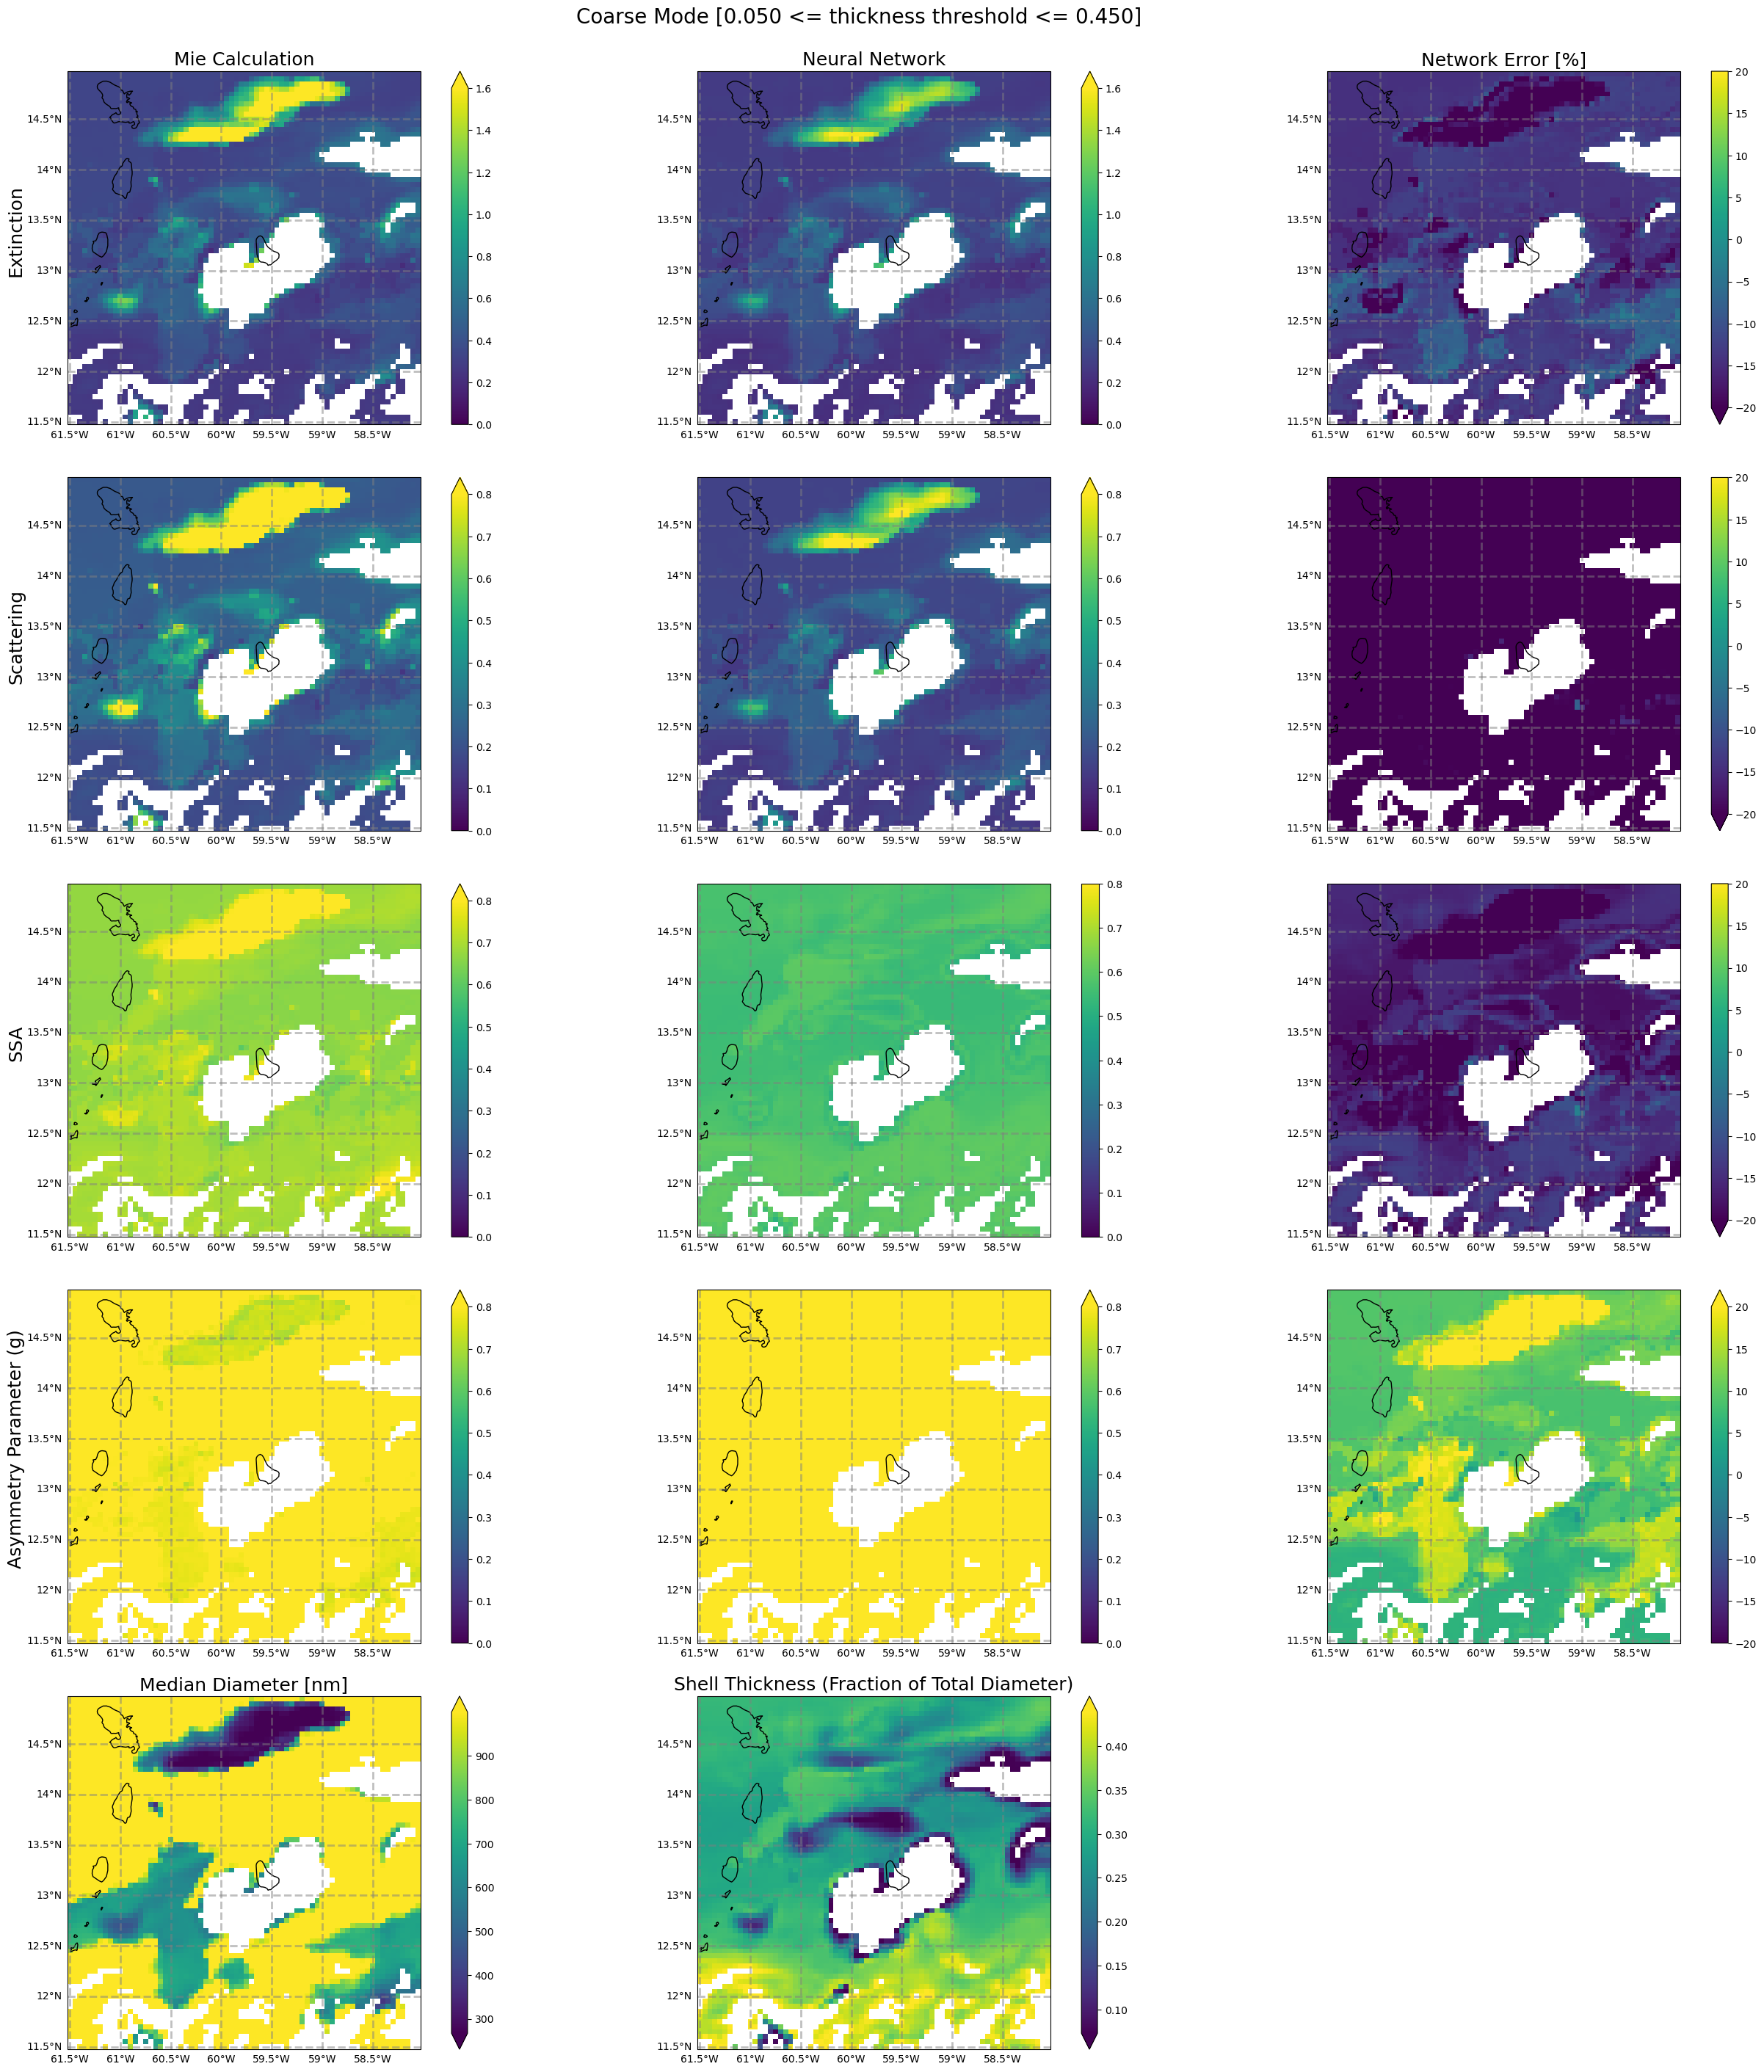

time: 16.4 s (started: 2023-07-07 17:15:12 +02:00)


In [10]:
thres1 = 0.05
thres2 = 0.45

cond = (mie.rcoat >= thres1) & (mie.rcoat <= thres2)

fig = plt.figure(figsize=(33, 35))
ax1 = fig.add_subplot(5, 3, 1, projection=ccrs.PlateCarree())
ax2 = fig.add_subplot(5, 3, 2, projection=ccrs.PlateCarree())
ax3 = fig.add_subplot(5, 3, 3, projection=ccrs.PlateCarree())
ax4 = fig.add_subplot(5, 3, 4, projection=ccrs.PlateCarree())
ax5 = fig.add_subplot(5, 3, 5, projection=ccrs.PlateCarree())
ax6 = fig.add_subplot(5, 3, 6, projection=ccrs.PlateCarree())
ax7 = fig.add_subplot(5, 3, 7, projection=ccrs.PlateCarree())
ax8 = fig.add_subplot(5, 3, 8, projection=ccrs.PlateCarree())
ax9 = fig.add_subplot(5, 3, 9, projection=ccrs.PlateCarree())
ax10 = fig.add_subplot(5, 3, 10, projection=ccrs.PlateCarree())
ax11 = fig.add_subplot(5, 3, 11, projection=ccrs.PlateCarree())
ax12 = fig.add_subplot(5, 3, 12, projection=ccrs.PlateCarree())

ax13 = fig.add_subplot(5, 3, 13, projection=ccrs.PlateCarree())
ax14 = fig.add_subplot(5, 3, 14, projection=ccrs.PlateCarree())

axes = (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14)

col = 'Extinction'
cond1 = 100 * (eprop[col] - prop[col]) / prop[col]
xr.where(cond, prop[col], np.nan).plot(ax=ax1, vmax=1.6, vmin=0, robust=True)
xr.where(cond, eprop[col], np.nan).plot(ax=ax2, vmax=1.6, vmin=0, robust=True)
xr.where(cond, cond1, np.nan).plot(ax=ax3, vmax=20, vmin=-20, robust=True)

col = 'Scattering'
cond1 = 100 * (eprop[col] - prop[col]) / prop[col]
xr.where(cond, prop[col], np.nan).plot(ax=ax4, vmax=0.8, vmin=0, robust=True)
xr.where(cond, eprop[col], np.nan).plot(ax=ax5, vmax=0.8, vmin=0, robust=True)
xr.where(cond, cond1, np.nan).plot(ax=ax6, vmax=20, vmin=-20, robust=True)

col = 'SSA'
# prop[col] = prop['Scattering'] / prop['Extinction']
# eprop[col] = eprop['Scattering'] / eprop['Extinction']
cond1 = 100 * (eprop[col] - prop[col]) / prop[col]
xr.where(cond, prop[col], np.nan).plot(ax=ax7, vmax=0.8, vmin=0, robust=True)
xr.where(cond, eprop[col], np.nan).plot(ax=ax8, vmax=0.8, vmin=0, robust=True)
xr.where(cond, cond1, np.nan).plot(ax=ax9, vmax=20, vmin=-20, robust=True)

col = 'g'
cond1 = 100 * (eprop[col] - prop[col]) / prop[col]
xr.where(cond, prop[col], np.nan).plot(ax=ax10, vmax=0.8, vmin=0, robust=True)
xr.where(cond, eprop[col], np.nan).plot(ax=ax11, vmax=0.8, vmin=0, robust=True)
xr.where(cond, cond1, np.nan).plot(ax=ax12, vmax=20, vmin=-20, robust=True)

xr.where(cond, mie.bins['mu'], np.nan).plot(ax=ax13, cbar_kwargs={'label':''}, robust=True)
xr.where(cond, mie.rcoat, np.nan).plot(ax=ax14, cbar_kwargs={'label':''}, robust=True)

ax1.text(-0.12, 0.55, 'Extinction', transform=ax1.transAxes, va='bottom', ha='center', rotation='vertical', rotation_mode='anchor', fontsize=18)
ax4.text(-0.12, 0.55, 'Scattering', transform=ax4.transAxes, va='bottom', ha='center', rotation='vertical', rotation_mode='anchor', fontsize=18)
ax7.text(-0.12, 0.55, 'SSA', transform=ax7.transAxes, va='bottom', ha='center', rotation='vertical', rotation_mode='anchor', fontsize=18)
ax10.text(-0.12, 0.55, 'Asymmetry Parameter (g)', transform=ax10.transAxes, va='bottom', ha='center', rotation='vertical', rotation_mode='anchor', fontsize=18)

ax1.set_title('Mie Calculation', fontsize=18)
ax2.set_title('Neural Network', fontsize=18)
ax3.set_title('Network Error [%]', fontsize=18)
ax13.set_title('Median Diameter [nm]', fontsize=18)
ax14.set_title('Shell Thickness (Fraction of Total Diameter)', fontsize=18)

plt.suptitle('%s Mode [%.3f <= thickness threshold <= %.3f]'%(mode_name[mode].capitalize(), thres1, thres2), y=0.905, x=0.51, fontsize=20)

for ax in axes:
    #ax.set_xlabel('Longitude', fontsize=16)
    #ax.set_ylabel('Latitude', fontsize=16)
    ax.add_feature(cfeature.COASTLINE)
    ax.tick_params(labelsize=12)
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    #ax.set_aspect(0.5)
plt.subplots_adjust(hspace=0.15, wspace=0.02)
ofile = '/work/bb1070/b382177/mlp/figs/julia/'+'_'.join(filename.split('.')[0].split('/')[4:])+'_height_%s_mode_%s'%(height, mode)+'.png'
print(ofile+'\n')
plt.savefig(ofile, bbox_inches='tight')
plt.show()